In [1]:
from tools import Preprocessing, Clustering

import pandas as pd
import numpy as np

from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
import hdbscan

from scipy.cluster import hierarchy


from fancyimpute import KNN
from fancyimpute import MICE
from fancyimpute.bayesian_ridge_regression import BayesianRidgeRegression

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('seaborn-white')
pd.set_option('display.max_colwidth', -1)

Using TensorFlow backend.
/usr/lib/python3/dist-packages/matplotlib/__init__.py:874: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
# import the csv dataset as a pandas DataFrame
df = pd.read_csv('data/full_data.csv')
#df.columns

In [3]:
varlist = ['Production_Oil_bpd_2014',
           'Production_Oil_bpd_2015',
           'Production_Oil_bpd_2016',
#            'Import_Oil_bpd_2014',
#            'Import_Oil_bpd_2015',
#            'Import_Oil_bpd_2016',
#            'Export_Oil_bdp_2014',
#            'Export_Oil_bdp_2015',
#            'Export_Oil_bdp_2016',
#            'Reserves_Oil_2014',
#            'Reserves_Oil_2015',
#            'Reserves_Oil_2016'
          ]

In [4]:
prep = Preprocessing('data/full_data.csv',
                     varlist=varlist, verbose=False)
prep.export_csv('data/cleaned_data_petroleum.csv', impute=False)

/home/lupol/dev/clustering-economies/tools.py:104: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  self.country_names = self.df['Country Name'].as_matrix()


The imported dataset as the following characteristics:
<class 'pandas.core.frame.DataFrame'>
Index: 37 entries, DZA to VNM
Columns: 3 entries, Production_Oil_bpd_2014 to Production_Oil_bpd_2016
dtypes: float64(3)
memory usage: 1.2+ KB
None
CUMULATIVE PROPORTION OF VARIANCE EXPLAINED BY PCs


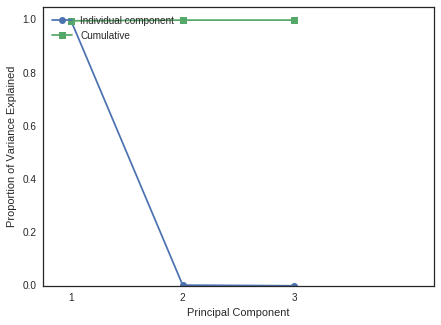

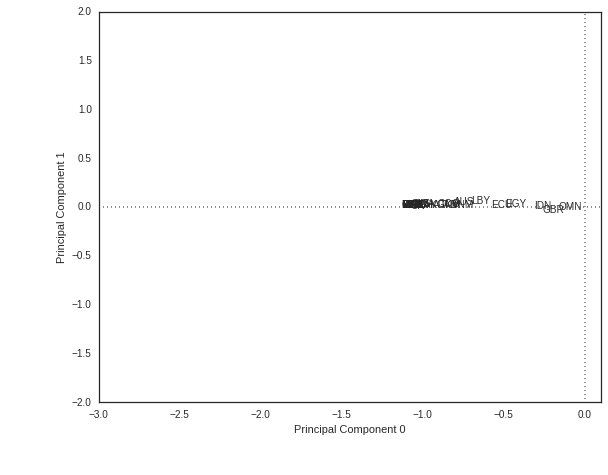

In [5]:
data = Clustering('data/cleaned_data_petroleum.csv')
data.get_PC()
data.plot_along_PC(pc1=0, pc2=1, xlim=[-3, 0.1], ylim=[-2, 2])

Hierarchical clustering with correlation distance metric.


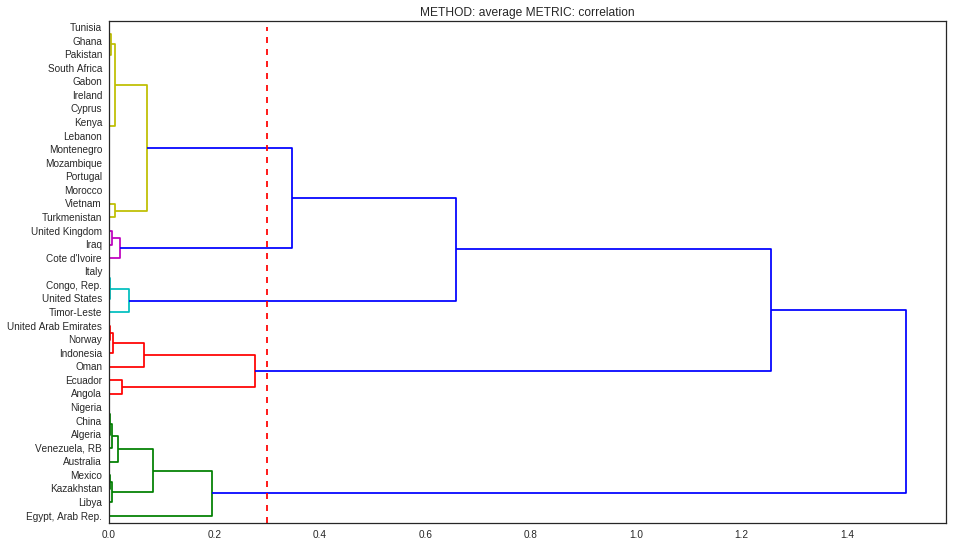

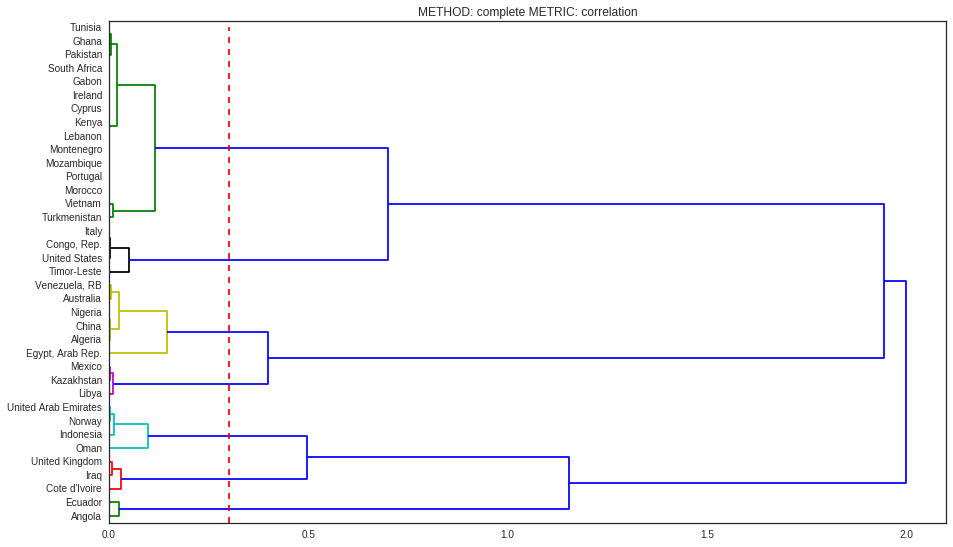

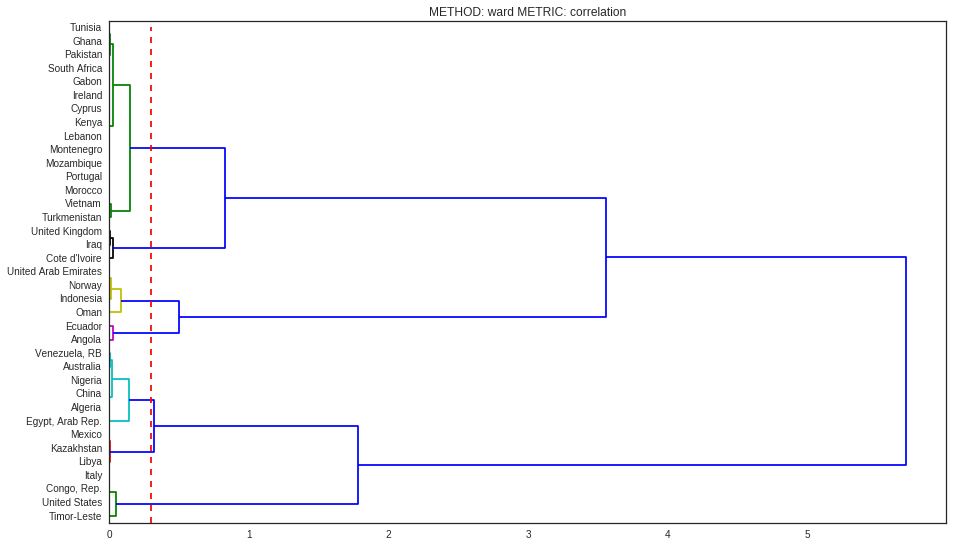

In [6]:
data.hierarchical_clustering(metric='correlation', method=['average', 'complete', 'ward'], threshold=0.3, on_PC=0)

In [7]:
data.clusterings['hierarchical_complete_correlation']

,
Cluster,
1,"[Angola, Ecuador]"
2,"[Cote d'Ivoire, Iraq, United Kingdom]"
3,"[Indonesia, Norway, Oman, United Arab Emirates]"
4,"[Kazakhstan, Libya, Mexico]"
5,"[Algeria, Australia, China, Egypt, Arab Rep., Nigeria, Venezuela, RB]"
6,"[Congo, Rep., Italy, Timor-Leste, United States]"
7,"[Cyprus, Gabon, Ghana, Ireland, Kenya, Lebanon, Montenegro, Morocco, Mozambique, Pakistan, Portugal, South Africa, Tunisia, Turkmenistan, Vietnam]"


In [8]:
data.hdbscan(min_cluster_size=2, on_PC=0)
data.clusterings['hdbscan']

,
Cluster,
0,"[Algeria, Angola, Kazakhstan, Norway]"
1,"[Mexico, Nigeria, Venezuela, RB]"
2,"[Indonesia, United Kingdom]"
3,"[Australia, Congo, Rep., Gabon, Turkmenistan, Vietnam]"
4,"[Cyprus, Ireland, Kenya, Lebanon, Montenegro, Morocco, Mozambique, Portugal, South Africa]"
5,"[Timor-Leste, Tunisia]"
6,"[Ghana, Italy, Pakistan]"
-1,"[China, Cote d'Ivoire, Ecuador, Egypt, Arab Rep., Iraq, Libya, Oman, United Arab Emirates, United States]"


In [9]:
help(KMeans)

Help on class KMeans in module sklearn.cluster.k_means_:

class KMeans(sklearn.base.BaseEstimator, sklearn.base.ClusterMixin, sklearn.base.TransformerMixin)
 |  K-Means clustering
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, optional, default: 8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  init : {'k-means++', 'random' or an ndarray}
 |      Method for initialization, defaults to 'k-means++':
 |  
 |      'k-means++' : selects initial cluster centers for k-mean
 |      clustering in a smart way to speed up convergence. See section
 |      Notes in k_init for more details.
 |  
 |      'random': choose k observations (rows) at random from data for
 |      the initial centroids.
 |  
 |      If an ndarray is passed, it should be of shape (n_clusters, n_features)
 |      and gives the initial centers.
 |  
 |  n_init : int, default: 10
 |      Number of time t

In [12]:
data.kmeans(n_clusters=7, on_PC=0)
data.clusterings['kmeans7']

,
Cluster,
0,"[Algeria, Angola, Kazakhstan, Norway]"
1,[United States]
2,"[Australia, Congo, Rep., Cote d'Ivoire, Cyprus, Gabon, Ghana, Ireland, Italy, Kenya, Lebanon, Montenegro, Morocco, Mozambique, Pakistan, Portugal, South Africa, Timor-Leste, Tunisia, Turkmenistan, Vietnam]"
3,"[China, Iraq]"
4,"[Ecuador, Egypt, Arab Rep., Indonesia, Libya, Oman, United Kingdom]"
5,[United Arab Emirates]
6,"[Mexico, Nigeria, Venezuela, RB]"
